In [1]:
import pandas as pd
import numpy as np
from plotly import tools

%run ../../UtilityPython.ipynb

In [2]:
df = pd.read_csv('./datasets/final_dataset_v2.csv', keep_default_na=False, na_values=['_'])
df.tail()

,ID,PROVINCIA,DATA,CAPACITA,SOGLIA GIALLA,SOGLIA ROSSA,MAX_DS,INTERVALLO_MAX_DS,TIPO_GIORNO_DS
178698,PSSTITAB-100DIRETTI_IPRGAAR001/0/1/1/14,AR,26-01-2020,450,360.0,405.0,80.2232,16:45,FES
178699,BSLOITEE-400MSANOLT,FI,26-01-2020,450,360.0,405.0,117.2371,21:45,FES
178700,SORAITAN-100DIRETTI_IPRGAFR003/101/0/0/20,FR,26-01-2020,450,360.0,405.0,118.9139,17:00,FES
178701,CUNEITAD-001MINIDSLAM0,CN,26-01-2020,8,6.0,7.2,4.0556,23:45,FES
178702,ASTIITAB-001MINIDSLAM0,AT,26-01-2020,8,6.0,7.2,5.3720,19:45,FES


In [3]:
df.groupby('DATA').size().to_frame('size').reset_index().sort_values(['DATA', 'size'], ascending=[True, False]).head()

,DATA,size
0,01-01-2020,5133
1,02-01-2020,5131
2,03-01-2020,5171
3,04-01-2020,5155
4,05-01-2020,5139


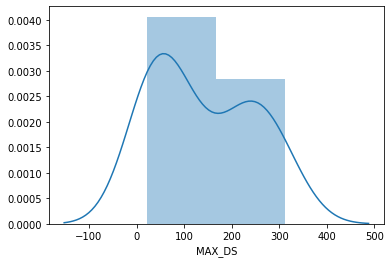

In [4]:
df.loc[:,'DATA'] = pd.to_datetime(df.DATA + ' ' + df.INTERVALLO_MAX_DS, format="%d-%m-%Y %H:%M")
x=df[(df.PROVINCIA=='RM') & (df.DATA=='2020-01-05 21:15')]['MAX_DS']
sns.distplot(x)

In [5]:
import datetime
#Aggregazione per DATA, aggregato a 3 ore, per PROVINCIA.
#Vediamo l'andamento della somma dei picchi (sum MAX_DS)
#.dt.strftime('%d-%m-%Y')
df_f=df.groupby(['DATA', 'PROVINCIA'], as_index=False).agg({'MAX_DS': "sum"})
df_f.set_index('DATA',inplace=True)
df_f.tail()

,PROVINCIA,MAX_DS
DATA,,
2020-01-26 23:45:00,SR,45.4287
2020-01-26 23:45:00,TO,71.2253
2020-01-26 23:45:00,UD,6.0009
2020-01-26 23:45:00,VA,40.0217
2020-01-26 23:45:00,VI,25.9858



----------- Calculate Mean -----------

989.4349750000001

----------- Calculate Median -----------

926.5476


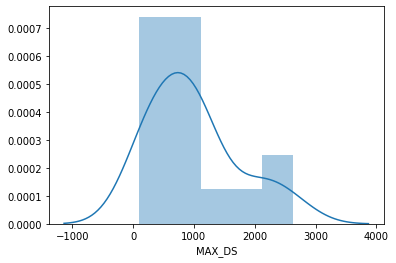

In [6]:
#Studiamo la distribuzione di MAX_DS per comprendere quale misura aggregata è rappresentativa
x=df_f[(df_f.PROVINCIA=='NA') & (df_f.index>='2020-01-19 15:00') & (df_f.index<='2020-01-19 18:45')]['MAX_DS']
print("\n----------- Calculate Mean -----------\n")
print(x.mean())

print("\n----------- Calculate Median -----------\n")
print(x.median())


sns.distplot(x)

In [7]:
df_rm_week1=df_f[(df_f.PROVINCIA=='RM') & (df_f.index>='2019-12-23 00:00') & (df_f.index<='2019-12-29 23:45')]
df_rm_3H_week1 = df_rm_week1['MAX_DS'].resample('3H').sum()

df_rm_week2=df_f[(df_f.PROVINCIA=='RM') & (df_f.index>='2019-12-30 00:00') & (df_f.index<='2020-01-05 23:45')]
df_rm_3H_week2 = df_rm_week2['MAX_DS'].resample('3H').sum()

df_rm_week3=df_f[(df_f.PROVINCIA=='RM') & (df_f.index>='2020-01-06 00:00') & (df_f.index<='2020-01-12 23:45')]
df_rm_3H_week3 = df_rm_week3['MAX_DS'].resample('3H').sum()

df_rm_week4=df_f[(df_f.PROVINCIA=='RM') & (df_f.index>='2020-01-13 00:00') & (df_f.index<='2020-01-19 23:45')]
df_rm_3H_week4 = df_rm_week4['MAX_DS'].resample('3H').sum()

df_rm_week5=df_f[(df_f.PROVINCIA=='RM') & (df_f.index>='2020-01-20 00:00') & (df_f.index<='2020-01-26 23:45')]
df_rm_3H_week5 = df_rm_week5['MAX_DS'].resample('3H').sum()

In [8]:
import plotly.graph_objs as go

#time series by 3 hours
trace1 = go.Scatter(x = df_rm_3H_week1.index, y = df_rm_3H_week1, name = "SUM(MAX_DS)", line = dict(color = '#17BECF'), opacity = 0.8)
trace2 = go.Scatter(x = df_rm_3H_week2.index ,y = df_rm_3H_week2, name = "SUM(MAX_DS)", line = dict(color = '#7F7F7F'), opacity = 0.8)
trace3 = go.Scatter(x = df_rm_3H_week3.index ,y = df_rm_3H_week3, name = "SUM(MAX_DS)", line = dict(color ='#32CD32'), opacity = 0.8)
trace4 = go.Scatter(x = df_rm_3H_week4.index ,y = df_rm_3H_week4, name = "SUM(MAX_DS)", line = dict(color ='#AD9B0C'), opacity = 0.8)
trace5 = go.Scatter(x = df_rm_3H_week5.index ,y = df_rm_3H_week5, name = "SUM(MAX_DS)", line = dict(color ='#B22222'), opacity = 0.8)

fig = tools.make_subplots(rows=5, cols=1, specs=[[{}], [{}], [{}], [{}], [{}]])

fig.append_trace(trace1, 1,1)
fig.append_trace(trace2, 2,1)
fig.append_trace(trace3, 3,1)
fig.append_trace(trace4, 4,1)
fig.append_trace(trace5, 5,1)

fig['layout'].update( height=900,title='Time Series Max_DS provincia di RM', showlegend=False)

fig.show()

C:\Users\ant.pagano\AppData\Local\Continuum\anaconda3\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [9]:
#Domenica 5 gennaio 2020, ore 20.45, ROMA-TORINO

fig1 = tools.make_subplots(rows=1, cols=1, specs=[[{}]])

fig1.append_trace(trace1, 1,1)
fig1.append_trace(trace2, 1,1)
fig1.append_trace(trace3, 1,1)
fig1.append_trace(trace4, 1,1)
fig1.append_trace(trace5, 1,1)

fig1['layout'].update( height=900,title='Time Series Max_DS provincia di RM', showlegend=False)

fig1.show()

In [10]:
df_mi_week1=df_f[(df_f.PROVINCIA=='MI') & (df_f.index>='2019-12-23 00:00') & (df_f.index<='2019-12-29 23:45')]
df_mi_3H_week1 = df_mi_week1['MAX_DS'].resample('3H').mean()

df_mi_week2=df_f[(df_f.PROVINCIA=='MI') & (df_f.index>='2019-12-30 00:00') & (df_f.index<='2020-01-05 23:45')]
df_mi_3H_week2 = df_mi_week2['MAX_DS'].resample('3H').mean()

df_mi_week3=df_f[(df_f.PROVINCIA=='MI') & (df_f.index>='2020-01-06 00:00') & (df_f.index<='2020-01-12 23:45')]
df_mi_3H_week3 = df_mi_week3['MAX_DS'].resample('3H').mean()

df_mi_week4=df_f[(df_f.PROVINCIA=='MI') & (df_f.index>='2020-01-13 00:00') & (df_f.index<='2020-01-19 23:45')]
df_mi_3H_week4 = df_mi_week4['MAX_DS'].resample('3H').mean()

df_mi_week5=df_f[(df_f.PROVINCIA=='MI') & (df_f.index>='2020-01-20 00:00') & (df_f.index<='2020-01-26 23:45')]
df_mi_3H_week5 = df_mi_week5['MAX_DS'].resample('3H').mean()

In [11]:
#Inter-Atalanta  11/01/2020 20:45
#Domenica 19 gennaio 2020, ore 12.30, MILAN-UDINESE
#Domenica 26 gennaio 2020, ore 12.30, INTER-CAGLIARI

#time series by 3 hours
trace1 = go.Scatter(x = df_mi_3H_week1.index, y = df_mi_3H_week1, name = "SUM(MAX_DS)", line = dict(color = '#17BECF'), opacity = 0.8)
trace2 = go.Scatter(x = df_mi_3H_week2.index ,y = df_mi_3H_week2, name = "SUM(MAX_DS)", line = dict(color = '#7F7F7F'), opacity = 0.8)
trace3 = go.Scatter(x = df_mi_3H_week3.index ,y = df_mi_3H_week3, name = "SUM(MAX_DS)", line = dict(color ='#32CD32'), opacity = 0.8)
trace4 = go.Scatter(x = df_mi_3H_week4.index ,y = df_mi_3H_week4, name = "SUM(MAX_DS)", line = dict(color ='#AD9B0C'), opacity = 0.8)
trace5 = go.Scatter(x = df_mi_3H_week5.index ,y = df_mi_3H_week5, name = "SUM(MAX_DS)", line = dict(color ='#B22222'), opacity = 0.8)

fig = tools.make_subplots(rows=5, cols=1, specs=[[{}], [{}], [{}], [{}], [{}]])

fig.append_trace(trace1, 1,1)
fig.append_trace(trace2, 2,1)
fig.append_trace(trace3, 3,1)
fig.append_trace(trace4, 4,1)
fig.append_trace(trace5, 5,1)

fig['layout'].update( height=900,title='Time Series Max_DS provincia di MI', showlegend=False)

fig.show()

In [12]:
fig1 = tools.make_subplots(rows=1, cols=1, specs=[[{}]])

fig1.append_trace(trace1, 1,1)
fig1.append_trace(trace2, 1,1)
fig1.append_trace(trace3, 1,1)
fig1.append_trace(trace4, 1,1)
fig1.append_trace(trace5, 1,1)

fig1['layout'].update( height=900,title='Time Series Max_DS provincia di MI', showlegend=False)

fig1.show()

In [13]:
df_na_week1=df_f[(df_f.PROVINCIA=='NA') & (df_f.index>='2019-12-23 00:00') & (df_f.index<='2019-12-29 23:45')]
df_na_3H_week1 = df_na_week1['MAX_DS'].resample('3H').mean()

df_na_week2=df_f[(df_f.PROVINCIA=='NA') & (df_f.index>='2019-12-30 00:00') & (df_f.index<='2020-01-05 23:45')]
df_na_3H_week2 = df_na_week2['MAX_DS'].resample('3H').mean()

df_na_week3=df_f[(df_f.PROVINCIA=='NA') & (df_f.index>='2020-01-06 00:00') & (df_f.index<='2020-01-12 23:45')]
df_na_3H_week3 = df_na_week3['MAX_DS'].resample('3H').mean()

df_na_week4=df_f[(df_f.PROVINCIA=='NA') & (df_f.index>='2020-01-13 00:00') & (df_f.index<='2020-01-19 23:45')]
df_na_3H_week4 = df_na_week4['MAX_DS'].resample('3H').mean()

df_na_week5=df_f[(df_f.PROVINCIA=='NA') & (df_f.index>='2020-01-20 00:00') & (df_f.index<='2020-01-26 23:45')]
df_na_3H_week5 = df_na_week5['MAX_DS'].resample('3H').mean()

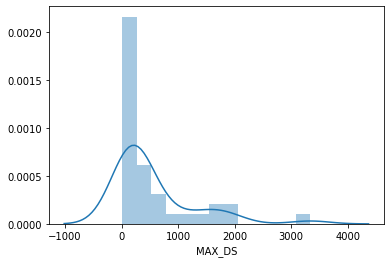

In [14]:
sns.distplot(df_na_3H_week4)

In [15]:
#

#time series by 3 hours
trace1 = go.Scatter(x = df_na_3H_week1.index, y = df_na_3H_week1, name = "SUM(MAX_DS)", line = dict(color = '#17BECF'), opacity = 0.8)
trace2 = go.Scatter(x = df_na_3H_week2.index ,y = df_na_3H_week2, name = "SUM(MAX_DS)", line = dict(color = '#7F7F7F'), opacity = 0.8)
trace3 = go.Scatter(x = df_na_3H_week3.index ,y = df_na_3H_week3, name = "SUM(MAX_DS)", line = dict(color ='#32CD32'), opacity = 0.8)
trace4 = go.Scatter(x = df_na_3H_week4.index ,y = df_na_3H_week4, name = "SUM(MAX_DS)", line = dict(color ='#AD9B0C'), opacity = 0.8)
trace5 = go.Scatter(x = df_na_3H_week5.index ,y = df_na_3H_week5, name = "SUM(MAX_DS)", line = dict(color ='#B22222'), opacity = 0.8)

fig = tools.make_subplots(rows=5, cols=1, specs=[[{}], [{}], [{}], [{}], [{}]])

fig.append_trace(trace1, 1,1)
fig.append_trace(trace2, 2,1)
fig.append_trace(trace3, 3,1)
fig.append_trace(trace4, 4,1)
fig.append_trace(trace5, 5,1)

fig['layout'].update( height=900,title='Time Series Max_DS provincia di NA', showlegend=False)

fig.show()

C:\Users\ant.pagano\AppData\Local\Continuum\anaconda3\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [16]:
fig1 = tools.make_subplots(rows=1, cols=1, specs=[[{}]])

fig1.append_trace(trace1, 1,1)
fig1.append_trace(trace2, 1,1)
fig1.append_trace(trace3, 1,1)
fig1.append_trace(trace4, 1,1)
fig1.append_trace(trace5, 1,1)

fig1['layout'].update( height=900,title='Time Series Max_DS provincia di NA', showlegend=False)

fig1.show()